<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center>Тема 4. Лінійні моделі класифікації та регресії

## <center>Частина 2. Лінійна класифікація
    
## План

1. [Лінійний класифікатор](#1.-Лінійний-класифікатор)
2. [Логістична регресія як лінійний класифікатор](#2.-Логістична-регресія-як-лінійний-класифікатор)
3. [Принцип максимальної правдоподібності та логістична регресія](#3.-Принцип-максимальної-правдоподібності-та-логістична-регресія)
4. [L2-регуляризація логістичної функції втрат](#4.-L2-регуляризація-логістичної-функції-втрат)
5. [Наочний приклад регуляризації логістичної регресії](#5.-Наочний-приклад-регуляризації-логістичної-регресії)
6. [Плюси і мінуси лінійних моделей в задачах машинного навчання](#6.-Плюси-і-мінуси-лінійних-моделей-в-задачах-машинного-навчання)

## 1. Лінійний класифікатор

Основна ідея лінійного класифікатора полягає в тому, що ознаковий простір може бути розділений гіперплощиною на два півпростори, в кожному з яких прогнозується одне з двох значень цільового класу.
Якщо це можна зробити без помилок, то навчальна вибірка називається *лінійно роздільною*.

<img src="../img/logit.png">

Ми вже знайомі з лінійної регресією і методом найменших квадратів. Розглянемо задачу бінарної класифікації, причому мітки цільового класу позначимо "+1" (позитивні приклади) і "-1" (негативні приклади).
Один з найпростіших лінійних класифікаторів отримується на основі регресії ось таким чином:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

де
 
- $\textbf{x}$ – вектор ознак прикладу (разом з одиницею);
 
- $\textbf{w}$ – ваги в лінійній моделі (разом зі зміщенням $w_0$);
 
- $\text{sign}(\bullet)$ - функція "сигнум", що повертає знак свого аргументу;
 
- $a(\textbf{x})$ - відповідь класифікатора на прикладі $\textbf{x}$.

## 2. Логістична регресія як лінійний класифікатор

Логістична регресія є окремим випадком лінійного класифікатора, але вона володіє хорошим "умінням" – прогнозувати ймовірність $p_+$ віднесення прикладу $\textbf{x}_\text{i}$ до класу "+":
$$\Large p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$$

Прогнозування не просто відповіді ("+1" або "-1"), а саме *ймовірності* віднесення до класу "+1" у багатьох задачах є дуже важливою бізнес-вимогою. Наприклад, в задачі кредитного скорингу, де традиційно застосовується логістична регресія, часто прогнозують ймовірність неповернення кредиту ($p_+$). Клієнтів, які звернулися за кредитом, сортують за цією передбаченою ймовірністю (за спаданням), і виходить скоркарт – по суті, рейтинг клієнтів від поганих до хороших. Нижче наведено іграшковий приклад такої скоркарти.
    <img src='../img/toy_scorecard.png' width=60%>

Банк вибирає для себе поріг $p^*$ передбаченої ймовірності неповернення кредиту (на рисунку – $0.15$) і починаючи з цього значення вже не видає кредит. Більше того, можна помножити передбачену ймовірність на видану суму і отримати математичне сподівання втрат з клієнта, що теж буде хорошою бізнес-метрикою.

Отже, ми хочемо прогнозувати ймовірність $p_+ \in [0,1]$, а поки вміємо будувати лінійний прогноз за допомогою МНК: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. Яким чином перетворити отримане значення в ймовірність, межі якої – [0, 1]? Очевидно, для цього потрібна деяка функція $f: \mathbb{R} \rightarrow [0,1].$ В моделі логістичної регресії для цього береться конкретна функція (сигмоїда): $\displaystyle\sigma(z) = \frac{1}{1 + \exp^{-z}}$. І зараз розберемося, які для цього передумови.
<img src='../img/sigmoid.png' width=50% />

Позначимо через $P(X)$ — ймовірність події $X$. Тоді відношення шансів $OR(X)$ визначається з $\displaystyle\frac{P(X)}{1-P(X)}$, а це — відношення ймовірностей того, що подія відбудеться і не відбудеться. Очевидно, що ймовірність і відношення шансів містять однакову інформацію. Але в той час як $P(X)$ знаходиться в межах від 0 до 1, $OR(X)$ знаходиться в межах від 0 до $\infty$.

Якщо обчислити логарифм $OR(X)$ (називається логарифм відношення шансів), то легко помітити, що $\log{OR(X)} \in \mathbb{R}$. Його ми і будемо прогнозувати за допомогою МНК.

Подивимося, як логістична регресія буде робити прогноз $p_+ = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ (поки вважаємо, що ваги $\textbf{w}$ ми якось отримали (тобто навчили модель), далі розберемося, як саме).

**Крок 1.** Обчислити значення $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (Рівняння $\textbf{w}^\text{T}\textbf{x} = 0$ задає гіперплощину, що розділяє приклади на 2 класи);


**Крок 2.** Обчислити логарифм відношення шансів: $ \log(OR_{+}) =  \textbf{w}^\text{T}\textbf{x}$.

**Крок 3.** Маючи прогноз шансів на віднесення до класу "+" – $OR_{+}$, обчислити $p_{+}$ за допомогою простої залежності:

$$\Large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$


У правій частині ми отримали якраз сигмоїду.

Отже, логістична регресія прогнозує ймовірність віднесення прикладу до класу "+" (за умови, що ми знаємо його ознаки і ваги моделі) як сигмоїд-перетворення лінійної комбінації вектора ваг моделі і вектора ознак прикладу:

$$\Large p_+(x_i) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}). $$

Наступне запитання: як модель навчається. Тут ми знову звертаємося до принципу максимальної правдоподібності.

## 3. Принцип максимальної правдоподібності та логістична регресія
Тепер подивимося, як з принципу максимальної правдоподібності отримується оптимізаційна задача, яку вирішує логістична регресія, а саме, – мінімізація *логістичної* функції втрат.
Тільки що ми побачили, що логістична регресія моделює ймовірність віднесення прикладу до класу "+" як

$$\Large p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тоді для класу "–" аналогічна ймовірність:
$$\Large p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Обидва вирази можна легко об'єднати в один:

$$\Large \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ називається *відступом* (*margin*) класифікації на об'єкті $\textbf{x}_\text{i}$. Якщо він невід'ємний, модель не помиляється на об'єкті $\textbf{x}_\text{i}$, якщо ж від'ємний – значить, клас для $\textbf{x}_\text{i}$ спрогнозований неправильно.
Зауважимо, що відступ визначено для об'єктів саме навчальної вибірки, для яких відомі реальні мітки цільового класу $y_i$.

Щоб зрозуміти, чому це ми зробили такі висновки, звернемося до геометричної інтерпретації лінійного класифікатора. Детально про це можна почитати в [матеріалах](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem09_linear.pdf) Євгенія Соколова.

Рекомендую розв'язати майже класичну задачу з початкового курсу лінійної алгебри: знайти відстань від точки з радіус-вектором $\textbf{x}_A$ до площини, яка задається рівнянням $\textbf{w}^\text{T}\textbf{x} = 0.$

Відповідь:
$\Large \rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \displaystyle\frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$

<img src = '../img/simple_linal_task.png' width=60%>

Коли отримаємо (або подивимося) відповідь, то зрозуміємо, що чим більший по модулю вираз $\textbf{w}^{\text{T}}\textbf{x}_\text{i}$, тим далі точка $\textbf{x}_\text{i}$ знаходиться від площини $\textbf{w}^{\text{T}}\textbf{x} = 0.$

Отже, вираз $M(\textbf{x}_\text{i}) = y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}$ – це свого роду "впевненість" моделі в класифікації об'єкта $\textbf{x}_\text{i}$:

- якщо відступ великий (по модулю) і додатний, це означає, що мітка класу поставлена правильно, а об'єкт знаходиться далеко від розділяючої гіперплощини (такий об'єкт класифікується впевнено). На рисунку – $x_3$.

- якщо відступ великий (по модулю) і від'ємний, значить мітка класу поставлена неправильно, а об'єкт знаходиться далеко від розділяючої гіперплощини (швидше за все такий об'єкт – аномалія, наприклад, його мітка в навчальній вибірці поставлена неправильно). На рисунку – $x_1$.

- якщо відступ малий (по модулю), то об'єкт знаходиться близько до розділяючої гіперплощини, а знак відступу визначає, чи правильно об'єкт класифікований. На рисунку – $x_2$ і $x_4$.

<img src = '../img/margin.png' width=60%>

Тепер розпишемо правдоподібність вибірки, а саме, ймовірність спостерігати даний вектор $\textbf{y}$ для вибірки $\textbf X$. Робимо сильне припущення: об'єкти приходять незалежно, з одного розподілу (незалежні однаково розподілені випадкові величини). Тоді

$$\Large \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

де $\ell$ – довжина вибірки $\textbf X$ (кількість рядків).

Візьмемо логарифм цього виразу (суму оптимізувати набагато простіше, ніж добуток):

$$\Large  \log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

Тобто в даному випадку принцип максимізації правдоподібності призводить до мінімізації виразу

$$\Large L_{log} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Це *логістична* функція втрат, просумована по всіх об'єктах навчальної вибірки.

Подивимося на нову фунцію як на функцію від відступу: $L(M) = \log (1 + \exp^{-M})$. Побудуємо її графік, а також графік 1/0 функції втрат (*zero-one loss*), яка просто штрафує модель на 1 за помилку на кожному об'єкті (відступ від'ємний): $L_{1/0}(M) = [M < 0]$.

<img src = '../img/logloss_margin.png' width=60%>

Рисунок відображає загальну ідею, що в задачі класифікації, не вміючи безпосередньо мінімізувати кількість помилок (принаймі, градієнтними методами це не зробити – похідна 1/0 функції втрат в нулі не існує), ми мінімізуємо деяку їх верхню оцінку. В даному випадку це логістична функція втрат (де логарифм двійковий, але це не принципово), і справедливо

$$\Large L_{\text{1/0}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}) = L_{\log} (\textbf X, \textbf{y}, \textbf{w}), $$

де $L_{\text{1/0}} (\textbf X, \textbf{y}, \textbf{w})$ – просто кількість помилок логістичної регресії з вагами $\textbf{w}$ на вибірці $(\textbf X, \textbf{y})$.

Тобто зменшуючи верхню оцінку $L_{\log}$ на кількість помилок класифікації, ми таким чином сподіваємося зменшити і саму кількість помилок.

## 4. L2-регуляризація логістичної функції втрат

**L2-регуляризація** логістичної регресії влаштована майже так само, як і у випадку з гребеневою (Ridge регресією). Замість функціоналу $L_{\log} (\textbf{X}, \textbf{y}, \textbf{w})$ мінімізується наступний:

$$\Large J(\textbf X, \textbf{y}, \textbf{w}) = L_{\log} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

У випадку логістичної регресії прийнято введення оберненого коефіцієнта регуляризації $C = \displaystyle\frac{1}{\lambda}$. І тоді розв'язком задачі буде

$$\Large \widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$

## 5. Наочний приклад регуляризації логістичної регресії

Подивимося, як регуляризація впливає на якість класифікації на наборі даних по тестуванню мікрочіпів з курсу Andrew Ng "Машинне навчання". Поліноміальні ознаки дозволяють лінійним моделям будувати нелінійні розділяючі поверхні.

Будемо використовувати логістичну регресію з поліноміальними ознаками і змінювати параметр регуляризації $C$.
Спочатку подивимося, як регуляризація впливає на розділяючу межу класифікатора, інтуїтивно розпізнаємо перенавчання і недонавчання.
Потім визначимо близький до оптимального параметр регуляризації за допомогою крос-валідації (`cross-validation`) і перебору по сітці (`GridSearch`).

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

Завантажуємо дані за допомогою методу `read_csv` бібліотеки` pandas`. У цьому наборі даних для 118 мікрочіпів (об'єкти) вказані результати двох тестів з контролю якості (дві кількісні ознаки) і сказано, чи пустили мікрочіп у виробництво. Ознаки вже центровані, тобто від усіх значень відняті середні по стовпцях. Таким чином, "середньому" мікрочіпу відповідають нульові значення результатів тестів.

In [2]:
# завантаження даних
data = pd.read_csv('../data/microchip_tests.txt', 
                   header=None, names=('test1', 'test2', 'released'))
# інформація про набір даних
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Подивимося на перші і останні 5 рядків.

In [3]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


Збережемо навчальну вибірку і мітки цільового класу в окремих масивах NumPy.

In [5]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

Відобразимо дані. Помаранчевий колір відповідає бракованим чіпам, синій – нормальним.

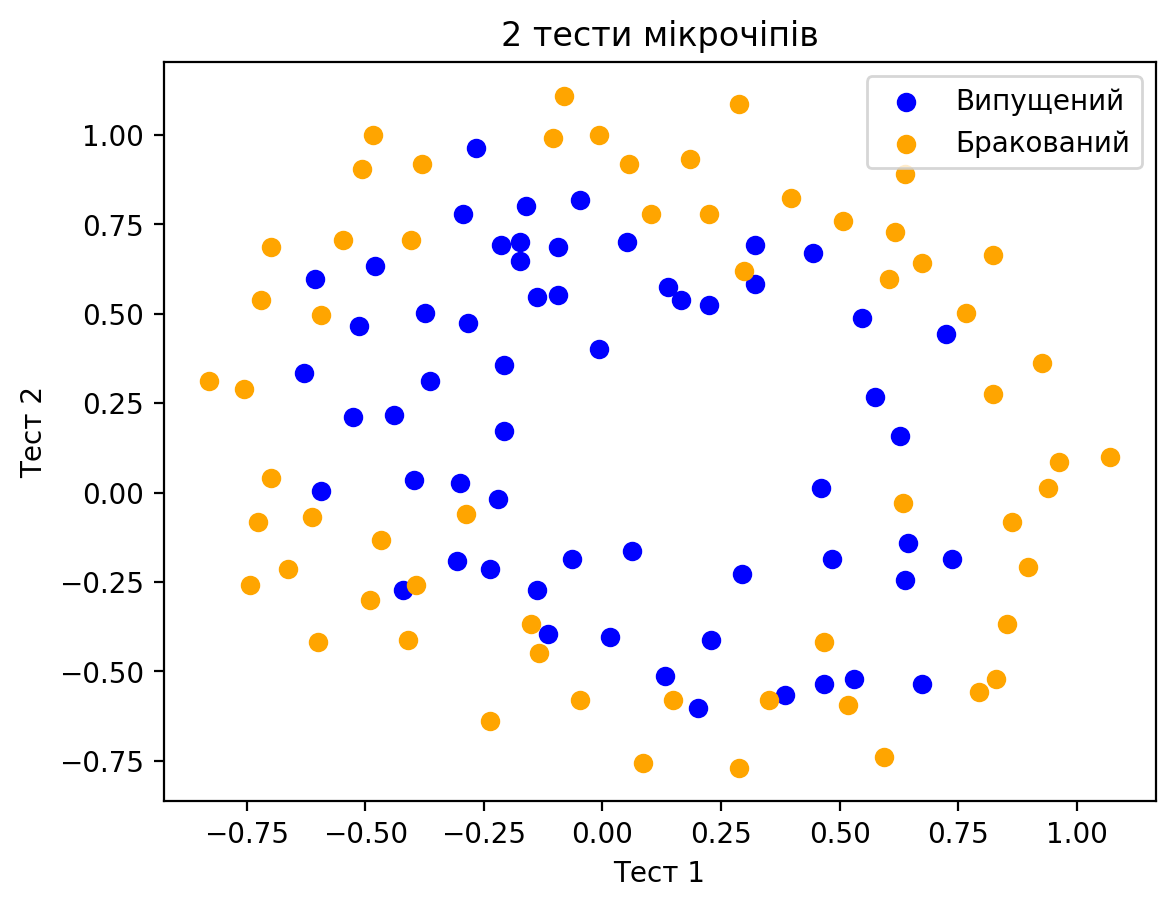

In [6]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Випущений')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Бракований')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів')
plt.legend();

Визначаємо функцію для відображення розділяючої кривої класифікатора

In [7]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # кожній точці в сітці [x_min, x_max]x[y_min, y_max]
    # ставимо у відповідність свій колір
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Поліноміальними ознаками до степеня $d$ для двох змінних $x_1$ і $x_2$ ми називаємо такі:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j\le d, i,j \in \mathbb{N}}$$

Наприклад, для $d=3$ це будуть наступні ознаки:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Намалювавши трикутник Паскаля, можна зрозуміти, скільки таких ознак буде для $d=4,5...$ і взагалі для будь-якого $d$.
Таких ознак експоненціально багато, і будувати поліноміальні ознаки великого степеня (наприклад, $d=10$), скажімо, для 100 ознак може бути затратно (а більше того, і не потрібно).

Створимо об'єкт `sklearn`, який додасть в матрицю $X$ поліноміальні ознаки аж до степеня 7.

In [8]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [9]:
X_poly.shape

(118, 36)

Навчимо логістичну регресію з параметром регуляризації $C = 10^{-2}$. Зобразимо розділяючу межу.
Також перевіримо частку правильних відповідей класифікатора на навчальній вибірці. Бачимо, що регуляризація виявилася
занадто сильною, і модель "недонавчилась".

Частка правильних відповідей класифікатора на навчальній вибірці: 0.627


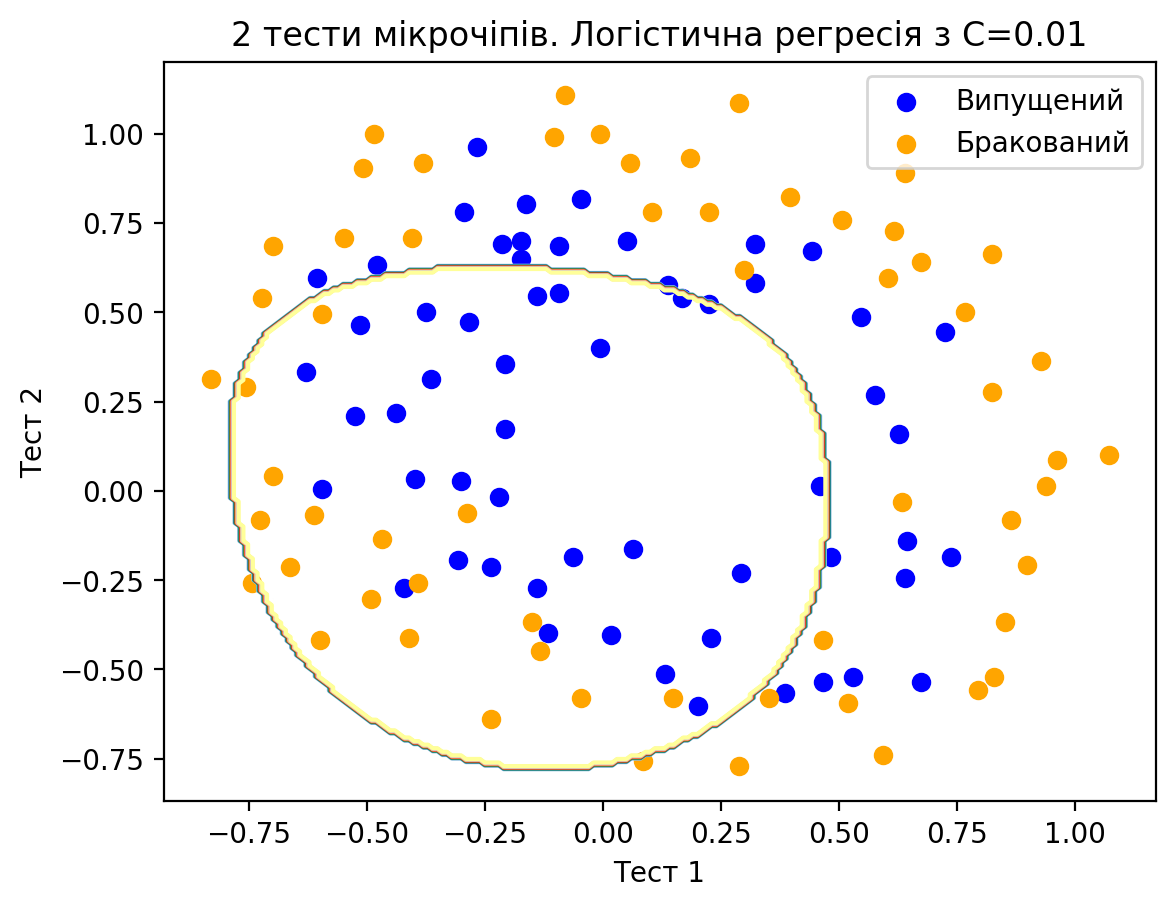

In [10]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Випущений')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Бракований')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логістична регресія з C=%s' % C)
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Збільшимо $C$ до 1. Тим самим ми *послаблюємо* регуляризацію, тепер в розв'язку значення ваг логістичної регресії можуть виявитися більшими (по модулю), ніж в попередньому випадку.

Частка правильних відповідей класифікатора на навчальній вибірці: 0.831


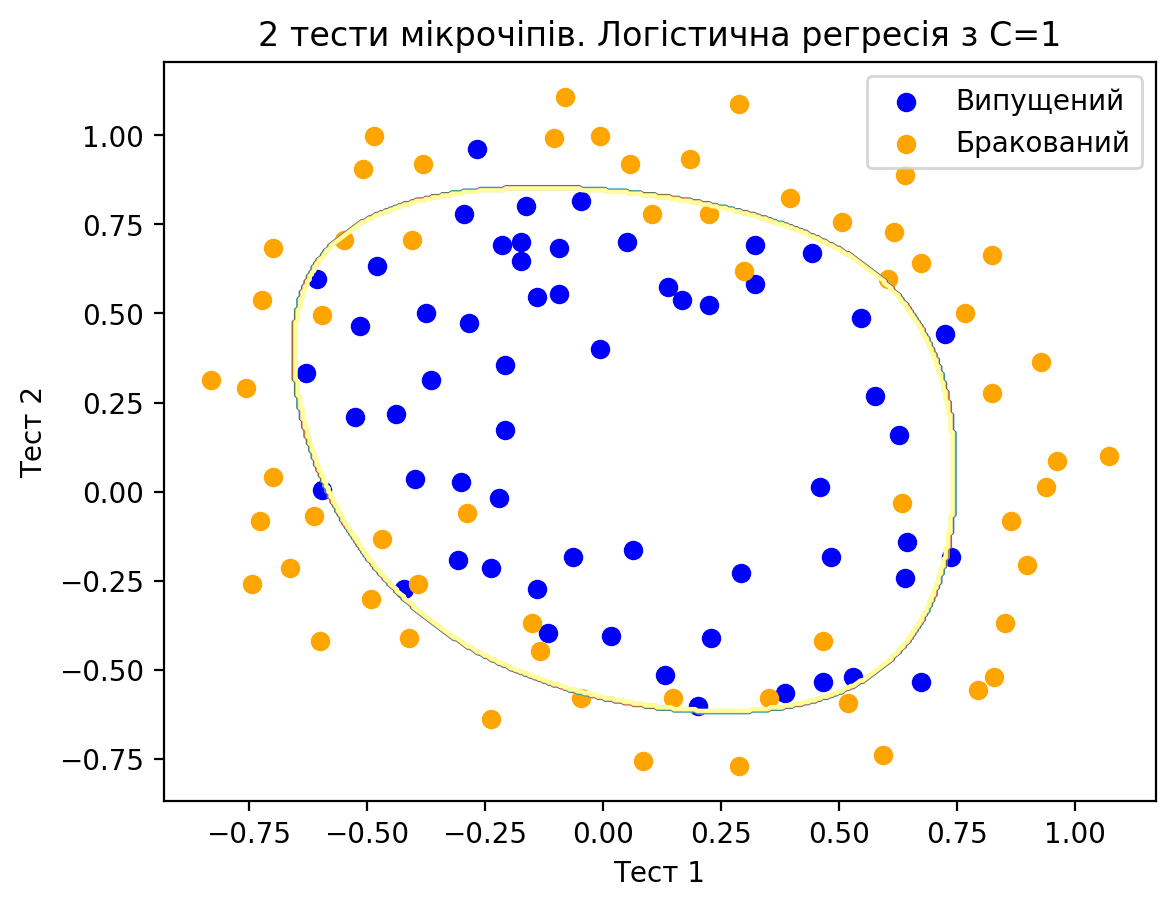

In [11]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Випущений')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Бракований')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логістична регресія з C=%s' % C)
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Ще збільшимо $C$ – до 10 тисяч. Тепер регуляризації явно недостатньо, і ми спостерігаємо перенавчання. Можна помітити, що в попередньому випадку (при $C=1$ і "гладкій" межі) частка правильних відповідей моделі на навчальній вибірці не набагато менша, ніж в 3-му випадку, зате на новій вибірці, можна собі уявити, 2-га модель спрацює набагато краще.

Частка правильних відповідей класифікатора на навчальній вибірці: 0.89


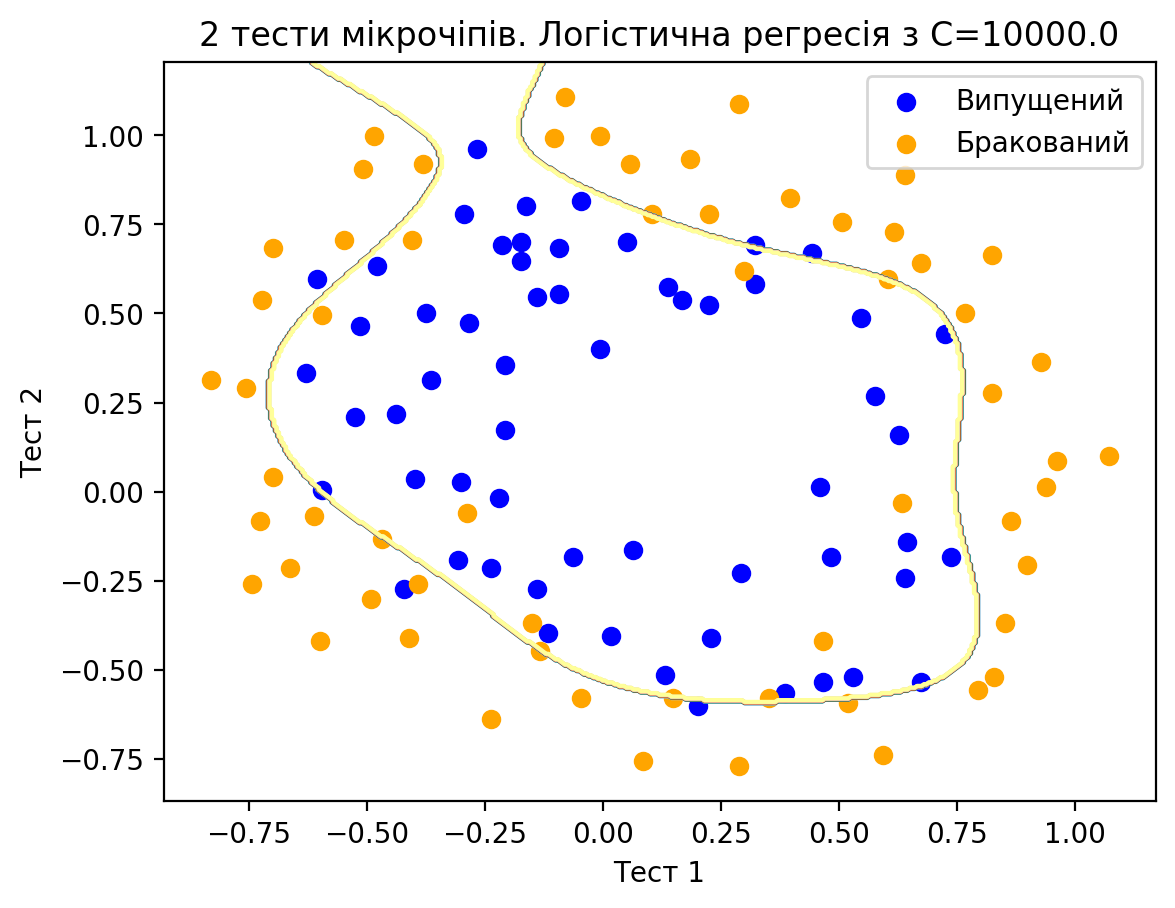

In [12]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Випущений')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Бракований')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 тести мікрочіпів. Логістична регресія з C=%s' % C)
plt.legend();

print("Частка правильних відповідей класифікатора на навчальній вибірці:", 
      round(logit.score(X_poly, y), 3))

Щоб проаналізувати результати, перепишемо формулу для функціоналу, який оптимізується в логістичній регресії, в такому вигляді:
$$\large J(X,y,w) = L + \frac{1}{C}||w||^2,$$

де
 
- $L$ – логістична функція втрат, просумована по всій вибірці
 
- $C$ – обернений коефіцієнт регуляризації (той самий $C$ в `sklearn`-реалізації `LogisticRegression`)

**Проміжні висновки**:
 
- чим більший параметр $C$, тим складніші залежності в даних може відновлювати модель (інтуїтивно $C$ відповідає "складності" моделі (model capacity))
 
- якщо регуляризація занадто сильна (малі значення $C$), то розв'язком задачі мінімізації логістичної функції втрат може виявитися те, коли багато ваг занулилися або стали занадто малими. Ще кажуть, що модель недостатньо "штрафується" за помилки (тобто в функціоналі $J$ "переважує" сума квадратів ваг, а помилка $L$ може бути відносно великою). В такому випадку модель виявиться *недонавченою* (1-ий випадок)
 
- навпаки, якщо регуляризація занадто слабка (великі значення $C$), то розв'язком задачі оптимізації може стати вектор $w$ з великими по модулю компонентами. В такому випадку більший внесок у функціонал $J$, що оптимізується має $L$ і, грубо кажучи, модель занадто "боїться" помилитися на об'єктах навчальної вибірки, тому виявиться *перенавченою* (3-ій випадок)
 
- те, яке значення $C$ вибрати, сама логістична регресія "не зрозуміє" (або ще кажуть "не вивчить"), тобто це не може бути визначено розв'язанням оптимізаційної задачі, якою є логістична регресія (на відміну від ваг $w$). Точно так само, дерево рішень не може "саме зрозуміти", яке обмеження на глибину вибрати (за один процес навчання). Тому $C$ – це *гіперпараметр* моделі, який налаштовується на крос-валідації, як і *max_depth* для дерева.

**Налаштування параметра регуляризації**

Тепер знайдемо оптимальне (в даному прикладі) значення параметра регуляризації $C$. Зробити це можна за допомогою `LogisticRegressionCV` – перебору параметрів по сітці з наступною крос-валідацією. Цей клас створений спеціально для логістичної регресії (для неї відомі ефективні алгоритми перебору параметрів), для довільної моделі ми б використовували `GridSearchCV`,`RandomizedSearchCV` або, наприклад, спеціальні алгоритми оптимізації гіперпараметрів, реалізовані в `hyperopt`.

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.7s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [14]:
logit_searcher.C_

array([150.78450459])

Подивимося, як якість моделі (частка правильних відповідей на навчальній і валідаційній вибірках) змінюється при зміні гіперпараметра $C$.

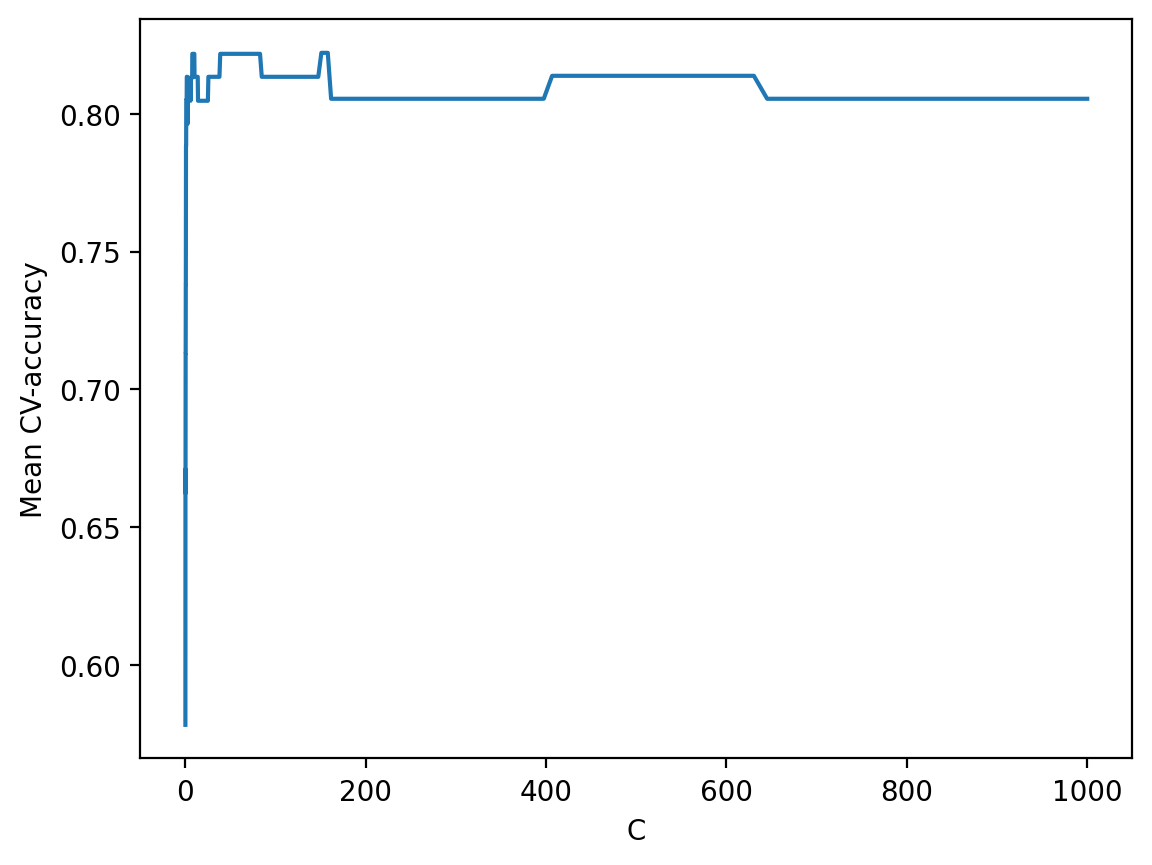

In [15]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

Виділимо ділянку з "кращими" значеннями C.

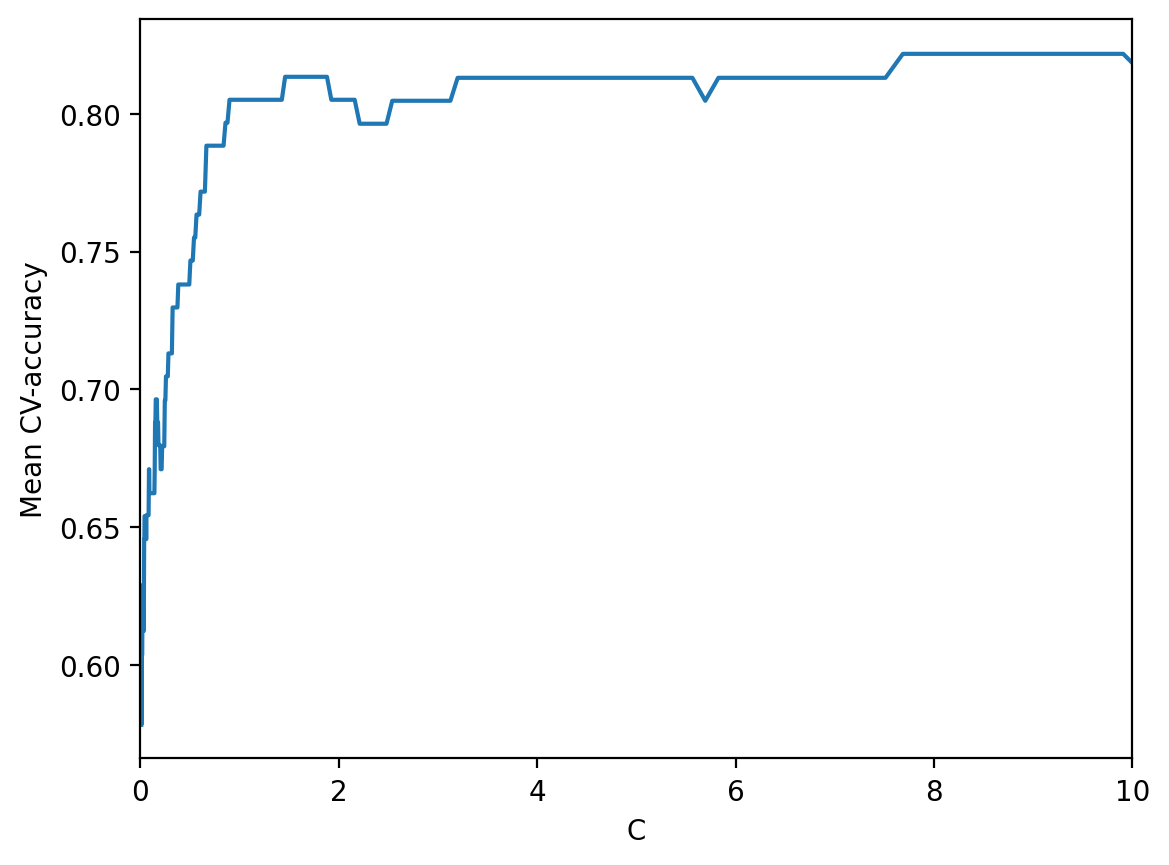

In [16]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,10));

Нагадаємо, що ці криві називаються *кривими валідації*. Раніше ми будували їх вручну, але в `sklearn` для їх побудови є спеціальні методи, які ми також будемо використовувати.

## 6. Плюси і мінуси лінійних моделей в задачах машинного навчання

Плюси:

- Добре вивчені;

- Дуже швидкі, можуть працювати на дуже великих вибірках;

- Практично поза конкуренцією, коли ознак дуже багато (від сотень тисяч і більше), і вони розріджені (хоча є ще факторизаційні машини);

- Коефіцієнти перед ознаками можуть інтерпретуватися (за умови, що ознаки масштабовані) – в лінійній регресії як часткові похідні залежної змінної від ознак, в логістичній – як зміна шансів на віднесення до одного з класів в $exp^{\beta_i}$ разів при зміні ознаки на 1 од., докладніше [тут](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf);

- Логістична регресія видає ймовірності віднесення до різних класів (це дуже цінується, наприклад, в кредитному скорингу);

- Модель може будувати і нелінійну межу, якщо на вхід подати поліноміальні ознаки.

Мінуси:

- Погано працюють в задачах, в яких залежність відповідей від ознак складна, нелінійна;

- На практиці припущення теореми Гаусса-Маркова майже ніколи не виконуються, тому частіше лінійні методи працюють гірше, ніж, наприклад, SVM і ансамблі.